<a href="https://colab.research.google.com/github/meghnaparsan/StyleTransferUsingTensorHub/blob/master/Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
  from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
tf.enable_eager_execution()

In [0]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import PIL.Image
import time
import functools

mpl.rcParams ['figure.figsize'] = (12, 12)
mpl.rcParams ['axes.grid'] = False

In [0]:
# content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
# style_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

style_path = "/content/drive/My Drive/Style_image.jpg"
content_path = "/content/drive/My Drive/Content_image.jpg"

In [0]:
def tensor_to_image (tensor):
  tensor = tensor * 255
  tensor = np.array (tensor, dtype = np.uint8)
  if np.ndim (tensor) > 3:
    assert tensor.shape [0] == 1
    tensor = tensor [0]
  return PIL.Image.fromarray(tensor)

In [0]:
def load_image (path_image):
  max_dim = 512
  image = tf.io.read_file (path_image)
  image = tf.image.decode_image (image, channels = 3)
  image = tf.image.convert_image_dtype (image, tf.float32)

  shape = tf.cast (tf.shape (image) [ : -1], tf.float32)
  long_dimension = max (shape)
  scale = max_dim / long_dimension

  new_shape = tf.cast (shape * scale, tf.int32)

  image = tf.image.resize (image, new_shape)
  image = image [tf.newaxis, :]
  return image

In [0]:
def image_show (image, title = None):
  if (len (image.shape) > 3):
    image = tf.squeeze (image, axis = 0)

  plt.imshow (image)
  if title:
    plt.title (title)

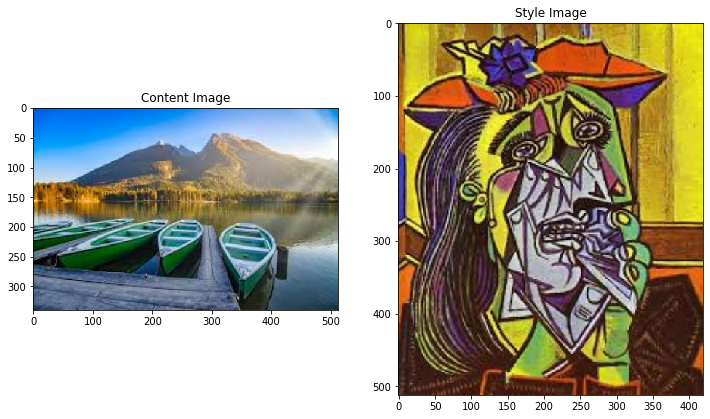

In [7]:
content_image = load_image(content_path)
style_image = load_image (style_path)

plt.subplot (1, 2, 1)
image_show (content_image, "Content Image")
plt.subplot (1, 2, 2)
image_show (style_image, "Style Image")

In [0]:
import tensorflow_hub as hub

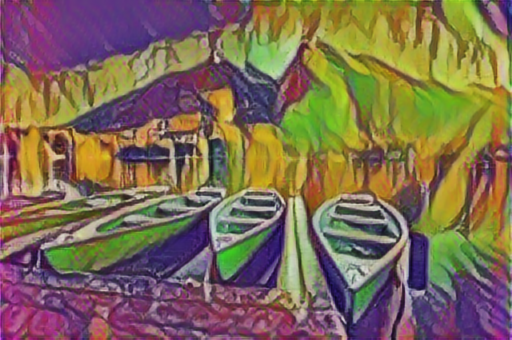

In [9]:
hub_module = hub.load ("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1")
stylized_image = hub_module (tf.constant (content_image), tf.constant (style_image)) [0]
tensor_to_image (stylized_image)